In [1]:
# required packages
import os 
import pandas as pd
file_path = os.getcwd() + '/Football_teams.csv'
df = pd.read_csv(file_path) # index_col = "Team"
df.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [2]:
# renaming column's name
df.rename(columns={'Shots pg' : 'Shots_pg',
                   'Possesion%': 'Possesion_perc',
                   'Pass%': 'Pass_perc'},
          inplace=True)

# converting names into lower case
df.columns = [col.lower() for col in df.columns]
print(df.columns)

Index(['team', 'tournament', 'goals', 'shots_pg', 'yellow_cards', 'red_cards',
       'possession%', 'pass_perc', 'aerialswon', 'rating'],
      dtype='object')


In [3]:
df.head()

,team,tournament,goals,shots_pg,yellow_cards,red_cards,possession%,pass_perc,aerialswon,rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [4]:
df.pivot (index = "team", columns = "tournament", values = "rating")

df2 = df.pivot (index = "team", columns = "tournament", values = "rating")

In [5]:
df["all_cards"] = df.apply(lambda x:x['yellow_cards'] + x['red_cards'], axis = 1)
df

,team,tournament,goals,shots_pg,yellow_cards,red_cards,possession%,pass_perc,aerialswon,rating,all_cards
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01,48
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95,47
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88,80
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87,70
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86,59
...,...,...,...,...,...,...,...,...,...,...,...
93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46,76
94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43,89
95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43,95
96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42,80


In [6]:
print(os.getcwd())
# os.chdir('Documents/UCD_Phyton/UCD_Football')
# print("Change to: ", os.getcwd())

/Users/luca/Documents/UCD_Phyton/UCDPA_FeliceMaglione


In [7]:
# total goals per tournament by teams
df.groupby(['tournament']).sum()['goals'].sort_values(ascending = False)

tournament
Serie A           1160
Ligue 1           1049
Premier League    1024
LaLiga             953
Bundesliga         928
Name: goals, dtype: int64

In [8]:
# created new column "all cards"
def sum_cards(x,y):
    return x+y
df["all_cards"] = df.apply(lambda x: sum_cards (x = x['yellow_cards'], y = x['red_cards']), axis = 1)
df

,team,tournament,goals,shots_pg,yellow_cards,red_cards,possession%,pass_perc,aerialswon,rating,all_cards
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01,48
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95,47
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88,80
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87,70
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86,59
...,...,...,...,...,...,...,...,...,...,...,...
93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46,76
94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43,89
95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43,95
96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42,80


<AxesSubplot:xlabel='possession%', ylabel='goals'>

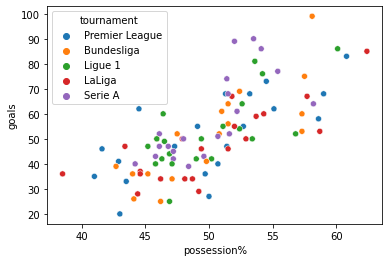

In [19]:
import seaborn as sns
sns.scatterplot(data = df, x = "possession%", y = "goals", hue = "tournament")

# 1. Variables (possesion and goals) are linearly correlated 
# 2. Serie A correlation is weaker than La Liga
# 3. Regression in LaLiga has smaller error in regression Serie A, because Serie A results have an higher dispersion
# 4. Serie A regression is Bimodal (two peaks) while La Liga regression is Unimodal (one peak)
# 5. There is no linear correlation between yellow and red cards

In [24]:
df_Liga = df [df['tournament'] == 'LaLiga']

<AxesSubplot:xlabel='possession%', ylabel='goals'>

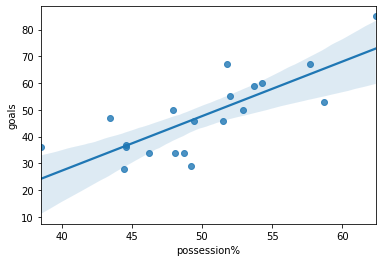

In [25]:
sns.regplot(data = df_Liga, x = "possession%", y = "goals")

<AxesSubplot:xlabel='possession%', ylabel='goals'>

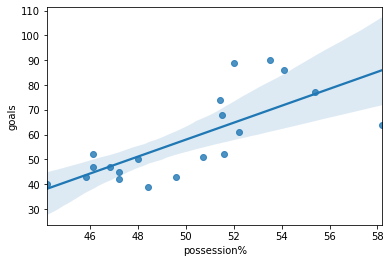

In [26]:
df_SerieA = df[df['tournament'] == 'Serie A']
sns.regplot(data = df_SerieA, x = "possession%", y = "goals")

/Users/luca/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luca/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goals', ylabel='Density'>

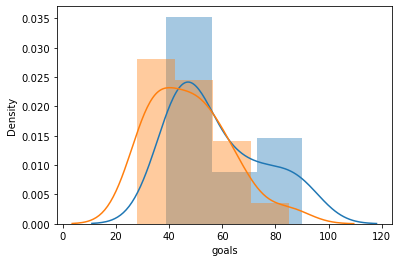

In [28]:
sns.distplot (df_SerieA['goals'])
sns.distplot (df_Liga ['goals'])

<AxesSubplot:xlabel='yellow_cards', ylabel='red_cards'>

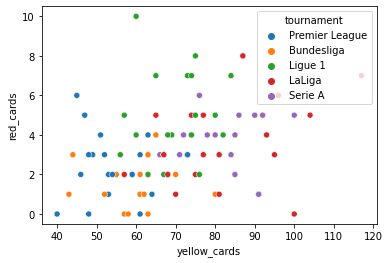

In [34]:
sns.scatterplot(data = df, x = "yellow_cards", y = "red_cards", hue = "tournament")

<AxesSubplot:xlabel='yellow_cards', ylabel='red_cards'>

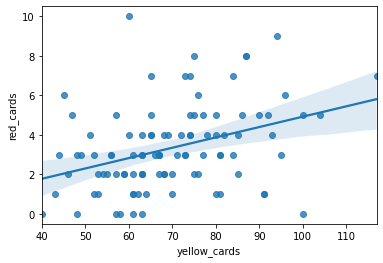

In [35]:
sns.regplot(data = df, x = "yellow_cards", y = "red_cards")

In [9]:
# checking the missing and NaNs
print("Data's original shape: ")
print(df.shape)

print("---"*25) # blank line
# dropping missing values
df.dropna(inplace=True)
print("Data after dropping Nulls:\n", df.isnull().sum() / df.shape[0] * 100)

Data's original shape: 
(98, 11)
---------------------------------------------------------------------------
Data after dropping Nulls:
 team            0.0
tournament      0.0
goals           0.0
shots_pg        0.0
yellow_cards    0.0
red_cards       0.0
possession%     0.0
pass_perc       0.0
aerialswon      0.0
rating          0.0
all_cards       0.0
dtype: float64


In [10]:
# calculate duplicates 
dups = df.duplicated()
# report if there are any duplicates
print("Print the duplicates if there is any: ", dups.any())
# # list all the duplicate row
# print(df[dups])

# deleted the duplicates 
print()
print("Original data shape: ", df.shape)
print()
df.drop_duplicates(inplace=True)
print("After deleting the duplicate: ", df.shape)

Print the duplicates if there is any:  False

Original data shape:  (98, 11)

After deleting the duplicate:  (98, 11)


In [11]:
# list comprehension: using loop and iterrows over the dataframe
[x for x in df.iterrows()]

[(0,
  team            Manchester City
  tournament       Premier League
  goals                        83
  shots_pg                   15.8
  yellow_cards                 46
  red_cards                     2
  possession%                60.8
  pass_perc                  89.4
  aerialswon                 12.8
  rating                     7.01
  all_cards                    48
  Name: 0, dtype: object),
 (1,
  team            Bayern Munich
  tournament         Bundesliga
  goals                      99
  shots_pg                 17.1
  yellow_cards               44
  red_cards                   3
  possession%              58.1
  pass_perc                85.5
  aerialswon               12.9
  rating                   6.95
  all_cards                  47
  Name: 1, dtype: object),
 (2,
  team            Paris Saint-Germain
  tournament                  Ligue 1
  goals                            86
  shots_pg                       15.0
  yellow_cards                     73
  red_cards    

# Python function to computes the frequency

    - to create reusable code
    - NumPy
    - Dictionary or List